### Introduction

- This exercise is the deliverable part of the laboratory series of the Statistical Methods subject.
- The exercise covers the main topics seen during the course:
  * Descriptive statistics
  * Confidence intervals
  * Hypothesis testing
  * Linear model
- You will need to answer the proposed questions across the notebook
- Once you have finished, please submit the exercise via the Campus Virtual application
- Please append your name and surname on the name of the exercise
- Thank you and good luck!

### Libraries

In [1]:
# Libraries
import numpy as np
import pandas as pd
from datetime import datetime as dt
from scipy import stats
import statsmodels.formula.api as sm_formula
import statsmodels.api as sm
from scipy import stats
import scipy
import math
import matplotlib.pyplot as plt
%matplotlib inline

### Data preparation

In [2]:
# Read data info
cardata=pd.read_csv('data/CarPrice_Assignment.csv')

In [3]:
# Initial inspection
cardata.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
cardata.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [5]:
# Check for null values
cardata.isnull().sum()   

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
# Descriptive statistics
cardata.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Data processing

In [7]:
cardata['CarName']=cardata['CarName'].apply(lambda name: name.split()[0])
cardata.rename(index=str,columns={'CarName':'Company'},inplace=True)
cardata['total_mpg']=(55*cardata['citympg']/100)+(45*cardata['highwaympg']/100)
cardata.drop(['car_ID','citympg','highwaympg'],axis=1,inplace=True)
cardata.symboling=cardata.symboling.astype(str)
cardata.head()

,symboling,Company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,total_mpg
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,23.70
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,23.70
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,six,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,22.15
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,four,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,26.70
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,five,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,19.80


In [8]:
# Fix some names
cardata.Company.replace('maxda','mazda',inplace=True)
cardata.Company.replace('Nissan','nissan',inplace=True)
cardata.Company.replace('porcshce','porsche',inplace=True)
cardata.Company.replace('toyouta','toyota',inplace=True)
cardata.Company.replace('vokswagen','volkswagen',inplace=True)
cardata.Company.replace('vw','volkswagen',inplace=True)

In [9]:
# We need to now handle categorical variables. We can convert them to binary variables using get_dummies()
# Each value in column becomes a separate column after getting the binarization
cardata=pd.get_dummies(cardata)

In [10]:
cardata.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'price', 'total_mpg', 'symboling_-1', 'symboling_-2',
       'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3',
       'Company_alfa-romero', 'Company_audi', 'Company_bmw', 'Company_buick',
       'Company_chevrolet', 'Company_dodge', 'Company_honda', 'Company_isuzu',
       'Company_jaguar', 'Company_mazda', 'Company_mercury',
       'Company_mitsubishi', 'Company_nissan', 'Company_peugeot',
       'Company_plymouth', 'Company_porsche', 'Company_renault',
       'Company_saab', 'Company_subaru', 'Company_toyota',
       'Company_volkswagen', 'Company_volvo', 'fueltype_diesel',
       'fueltype_gas', 'aspiration_std', 'aspiration_turbo', 'doornumber_four',
       'doornumber_two', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       'dri

### Descriptive statistics

wheelbase
count    205.000000
mean      98.756585
std        6.021776
min       86.600000
25%       94.500000
50%       97.000000
75%      102.400000
max      120.900000
Name: wheelbase, dtype: float64


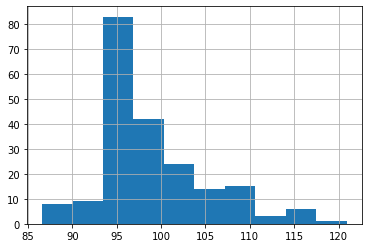

carlength
count    205.000000
mean     174.049268
std       12.337289
min      141.100000
25%      166.300000
50%      173.200000
75%      183.100000
max      208.100000
Name: carlength, dtype: float64


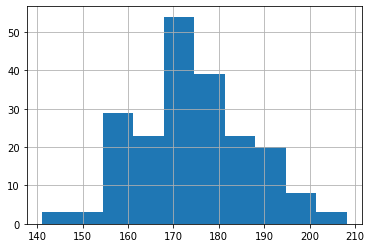

carwidth
count    205.000000
mean      65.907805
std        2.145204
min       60.300000
25%       64.100000
50%       65.500000
75%       66.900000
max       72.300000
Name: carwidth, dtype: float64


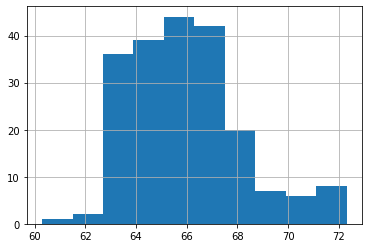

carheight
count    205.000000
mean      53.724878
std        2.443522
min       47.800000
25%       52.000000
50%       54.100000
75%       55.500000
max       59.800000
Name: carheight, dtype: float64


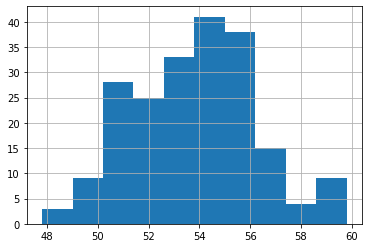

curbweight
count     205.000000
mean     2555.565854
std       520.680204
min      1488.000000
25%      2145.000000
50%      2414.000000
75%      2935.000000
max      4066.000000
Name: curbweight, dtype: float64


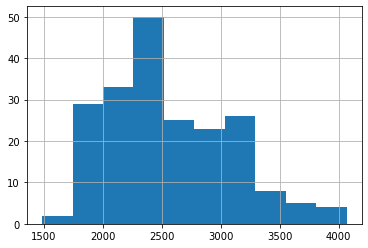

enginesize
count    205.000000
mean     126.907317
std       41.642693
min       61.000000
25%       97.000000
50%      120.000000
75%      141.000000
max      326.000000
Name: enginesize, dtype: float64


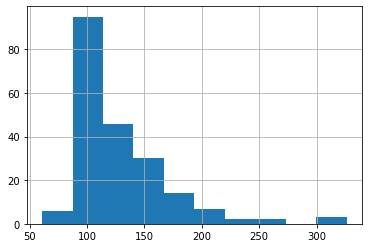

boreratio
count    205.000000
mean       3.329756
std        0.270844
min        2.540000
25%        3.150000
50%        3.310000
75%        3.580000
max        3.940000
Name: boreratio, dtype: float64


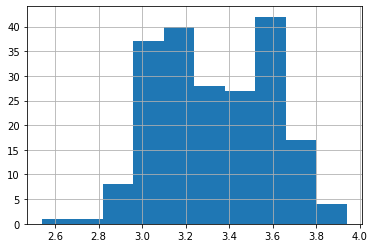

stroke
count    205.000000
mean       3.255415
std        0.313597
min        2.070000
25%        3.110000
50%        3.290000
75%        3.410000
max        4.170000
Name: stroke, dtype: float64


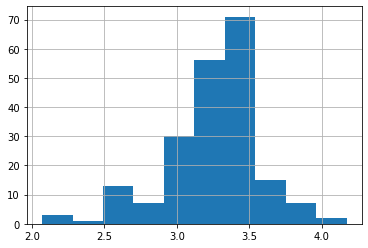

compressionratio
count    205.000000
mean      10.142537
std        3.972040
min        7.000000
25%        8.600000
50%        9.000000
75%        9.400000
max       23.000000
Name: compressionratio, dtype: float64


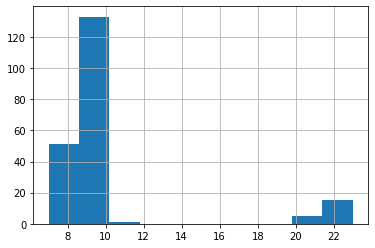

horsepower
count    205.000000
mean     104.117073
std       39.544167
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64


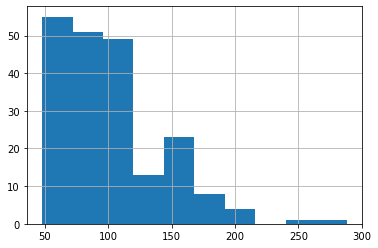

peakrpm
count     205.000000
mean     5125.121951
std       476.985643
min      4150.000000
25%      4800.000000
50%      5200.000000
75%      5500.000000
max      6600.000000
Name: peakrpm, dtype: float64


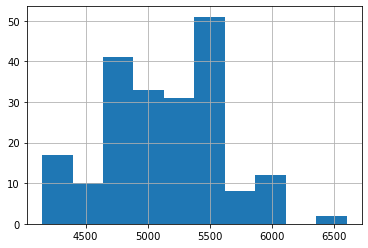

price
count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


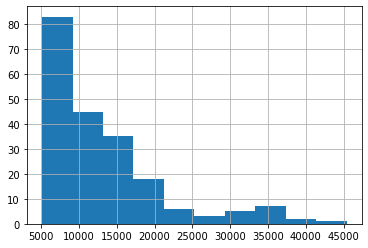

total_mpg
count    205.000000
mean      27.708780
std        6.649183
min       14.800000
25%       21.950000
50%       26.700000
75%       31.800000
max       51.250000
Name: total_mpg, dtype: float64


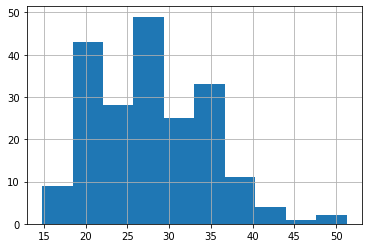

symboling_-1
count    205.000000
mean       0.107317
std        0.310274
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: symboling_-1, dtype: float64


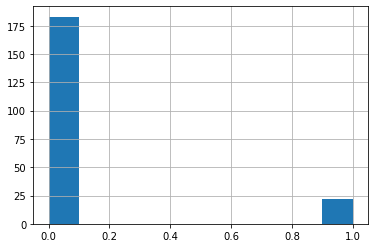

symboling_-2
count    205.000000
mean       0.014634
std        0.120377
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: symboling_-2, dtype: float64


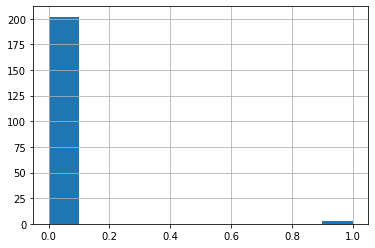

symboling_0
count    205.000000
mean       0.326829
std        0.470202
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: symboling_0, dtype: float64


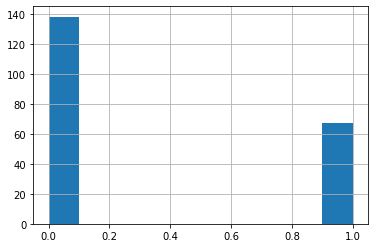

symboling_1
count    205.000000
mean       0.263415
std        0.441564
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: symboling_1, dtype: float64


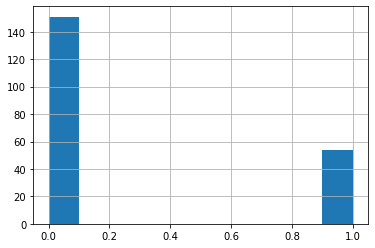

symboling_2
count    205.000000
mean       0.156098
std        0.363836
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: symboling_2, dtype: float64


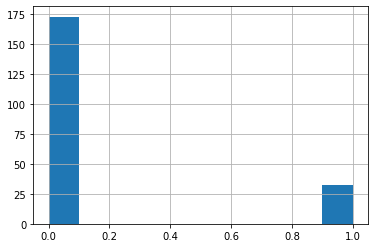

symboling_3
count    205.000000
mean       0.131707
std        0.339000
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: symboling_3, dtype: float64


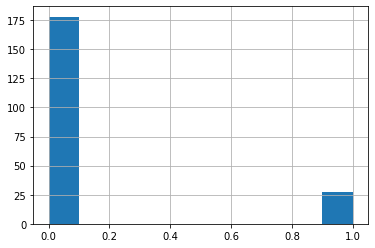

Company_alfa-romero
count    205.000000
mean       0.014634
std        0.120377
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Company_alfa-romero, dtype: float64


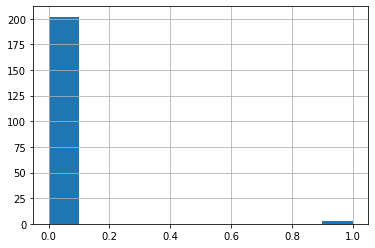

Company_audi
count    205.000000
mean       0.034146
std        0.182050
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Company_audi, dtype: float64


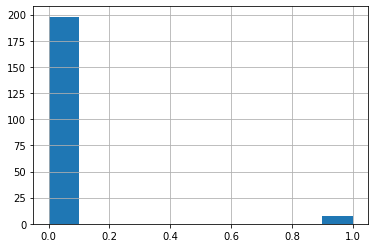

Company_bmw
count    205.000000
mean       0.039024
std        0.194127
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Company_bmw, dtype: float64


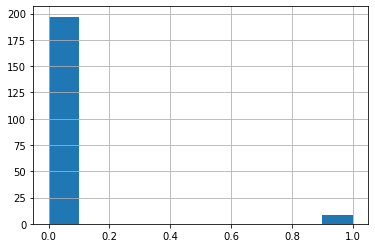

Company_buick
count    205.000000
mean       0.039024
std        0.194127
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Company_buick, dtype: float64


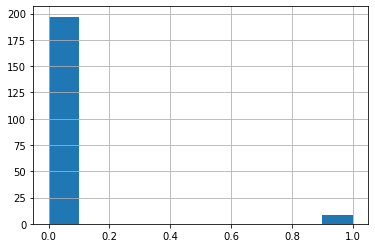

Company_chevrolet
count    205.000000
mean       0.014634
std        0.120377
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Company_chevrolet, dtype: float64


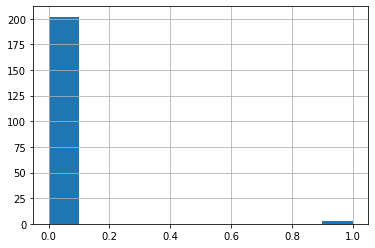

Company_dodge
count    205.000000
mean       0.043902
std        0.205380
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Company_dodge, dtype: float64


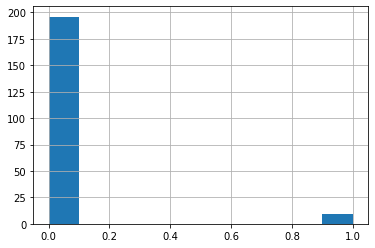

Company_honda
count    205.000000
mean       0.063415
std        0.244304
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Company_honda, dtype: float64


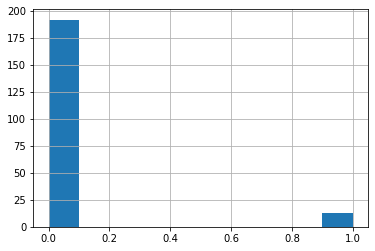

Company_isuzu
count    205.000000
mean       0.019512
std        0.138655
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Company_isuzu, dtype: float64


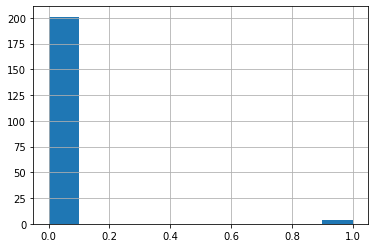

Company_jaguar
count    205.000000
mean       0.014634
std        0.120377
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Company_jaguar, dtype: float64


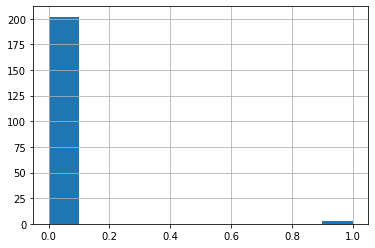

Company_mazda
count    205.000000
mean       0.082927
std        0.276447
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Company_mazda, dtype: float64


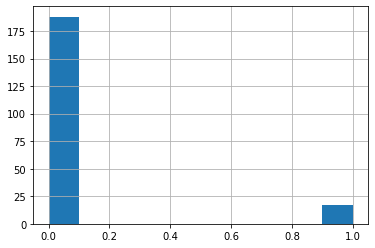

Company_mercury
count    205.000000
mean       0.004878
std        0.069843
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Company_mercury, dtype: float64


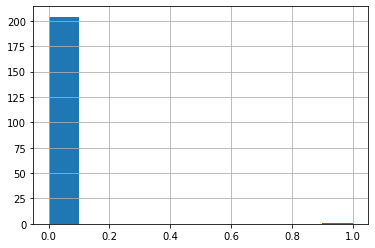

Company_mitsubishi
count    205.000000
mean       0.063415
std        0.244304
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Company_mitsubishi, dtype: float64


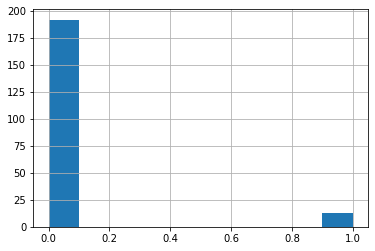

Company_nissan
count    205.000000
mean       0.087805
std        0.283704
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Company_nissan, dtype: float64


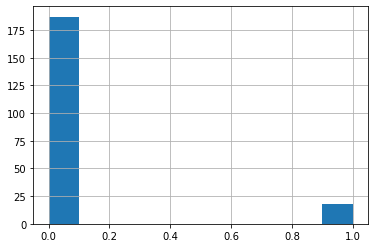

Company_peugeot
count    205.000000
mean       0.053659
std        0.225894
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Company_peugeot, dtype: float64


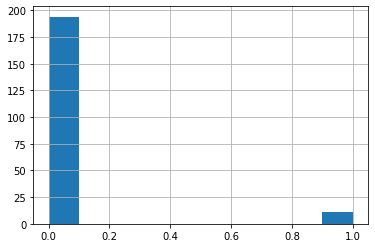

Company_plymouth
count    205.000000
mean       0.034146
std        0.182050
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Company_plymouth, dtype: float64


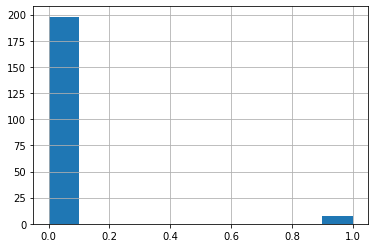

Company_porsche
count    205.000000
mean       0.024390
std        0.154635
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Company_porsche, dtype: float64


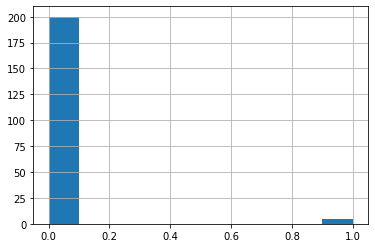

Company_renault
count    205.000000
mean       0.009756
std        0.098531
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Company_renault, dtype: float64


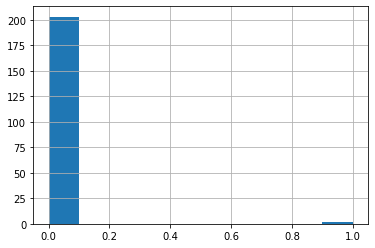

Company_saab
count    205.000000
mean       0.029268
std        0.168970
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Company_saab, dtype: float64


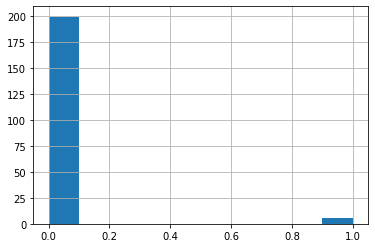

Company_subaru
count    205.000000
mean       0.058537
std        0.235330
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Company_subaru, dtype: float64


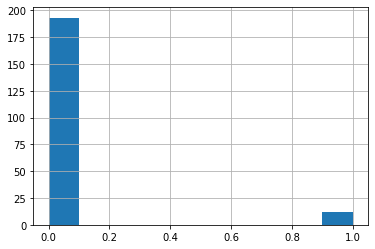

Company_toyota
count    205.000000
mean       0.156098
std        0.363836
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Company_toyota, dtype: float64


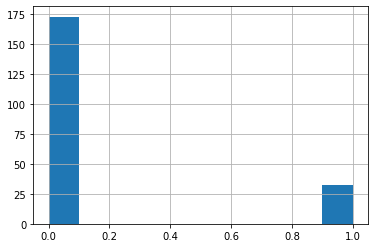

Company_volkswagen
count    205.000000
mean       0.058537
std        0.235330
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Company_volkswagen, dtype: float64


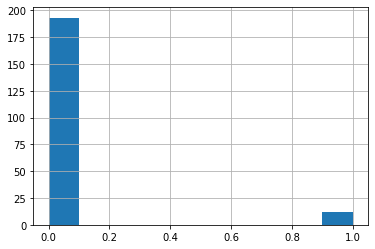

Company_volvo
count    205.000000
mean       0.053659
std        0.225894
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Company_volvo, dtype: float64


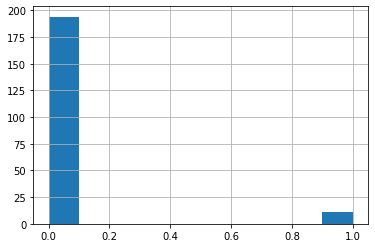

fueltype_diesel
count    205.000000
mean       0.097561
std        0.297446
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fueltype_diesel, dtype: float64


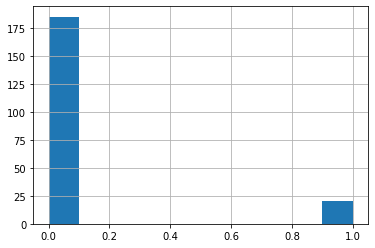

fueltype_gas
count    205.000000
mean       0.902439
std        0.297446
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: fueltype_gas, dtype: float64


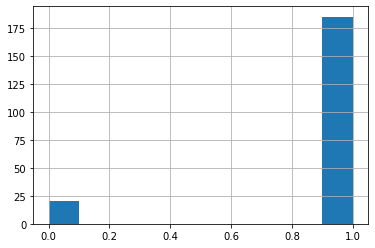

aspiration_std
count    205.000000
mean       0.819512
std        0.385535
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: aspiration_std, dtype: float64


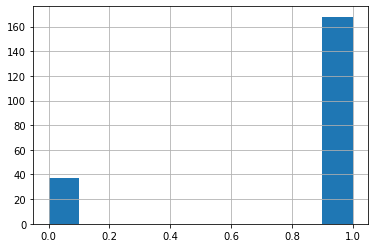

aspiration_turbo
count    205.000000
mean       0.180488
std        0.385535
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: aspiration_turbo, dtype: float64


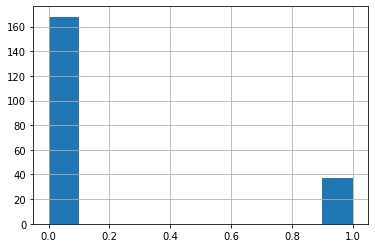

doornumber_four
count    205.000000
mean       0.560976
std        0.497483
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: doornumber_four, dtype: float64


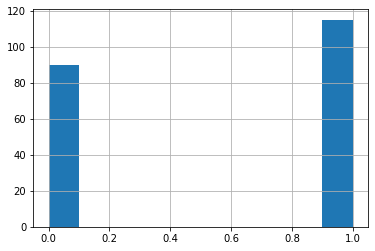

doornumber_two
count    205.000000
mean       0.439024
std        0.497483
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: doornumber_two, dtype: float64


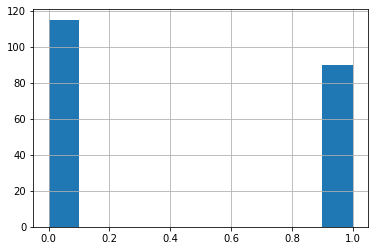

carbody_convertible
count    205.000000
mean       0.029268
std        0.168970
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: carbody_convertible, dtype: float64


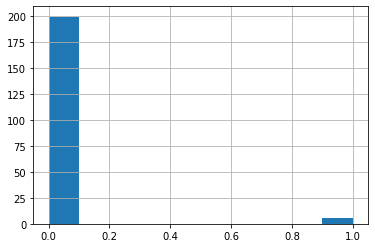

carbody_hardtop
count    205.000000
mean       0.039024
std        0.194127
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: carbody_hardtop, dtype: float64


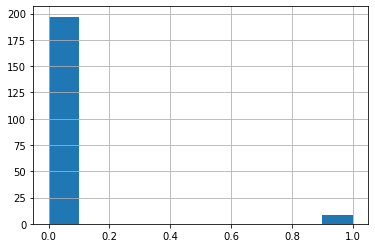

carbody_hatchback
count    205.000000
mean       0.341463
std        0.475361
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: carbody_hatchback, dtype: float64


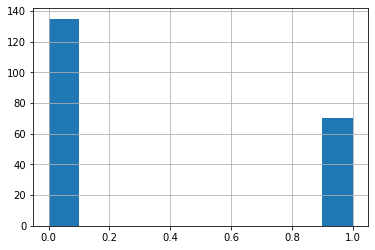

carbody_sedan
count    205.000000
mean       0.468293
std        0.500215
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: carbody_sedan, dtype: float64


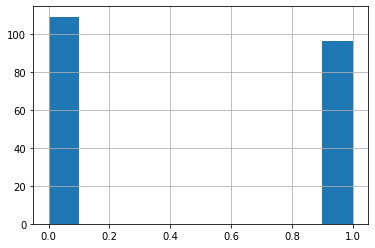

carbody_wagon
count    205.000000
mean       0.121951
std        0.328031
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: carbody_wagon, dtype: float64


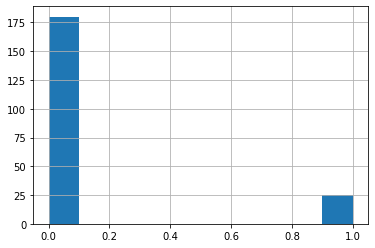

drivewheel_4wd
count    205.000000
mean       0.043902
std        0.205380
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: drivewheel_4wd, dtype: float64


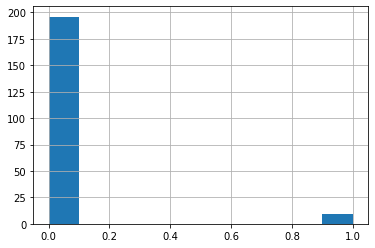

drivewheel_fwd
count    205.000000
mean       0.585366
std        0.493865
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: drivewheel_fwd, dtype: float64


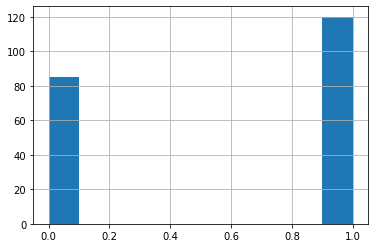

drivewheel_rwd
count    205.000000
mean       0.370732
std        0.484183
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: drivewheel_rwd, dtype: float64


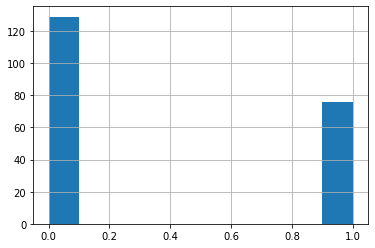

enginelocation_front
count    205.000000
mean       0.985366
std        0.120377
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: enginelocation_front, dtype: float64


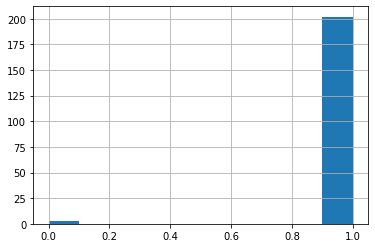

enginelocation_rear
count    205.000000
mean       0.014634
std        0.120377
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: enginelocation_rear, dtype: float64


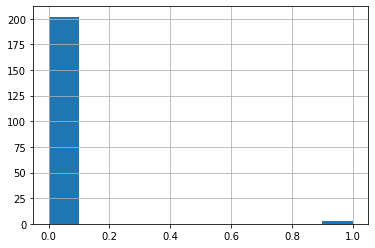

enginetype_dohc
count    205.000000
mean       0.058537
std        0.235330
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: enginetype_dohc, dtype: float64


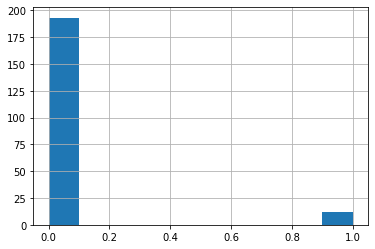

enginetype_dohcv
count    205.000000
mean       0.004878
std        0.069843
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: enginetype_dohcv, dtype: float64


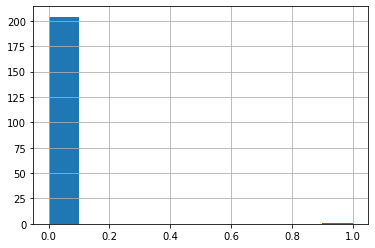

enginetype_l
count    205.000000
mean       0.058537
std        0.235330
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: enginetype_l, dtype: float64


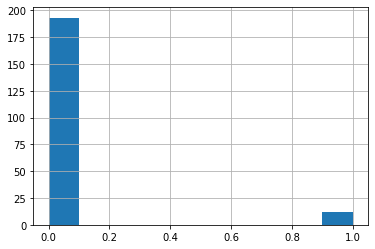

enginetype_ohc
count    205.000000
mean       0.721951
std        0.449134
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: enginetype_ohc, dtype: float64


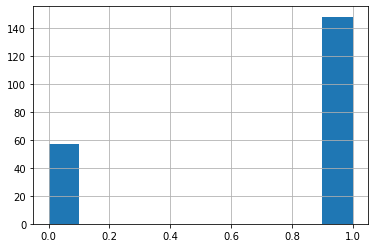

enginetype_ohcf
count    205.000000
mean       0.073171
std        0.261054
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: enginetype_ohcf, dtype: float64


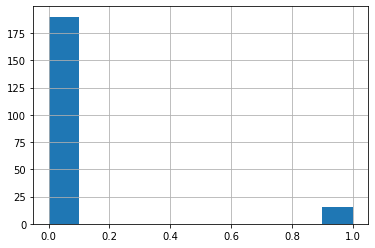

enginetype_ohcv
count    205.000000
mean       0.063415
std        0.244304
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: enginetype_ohcv, dtype: float64


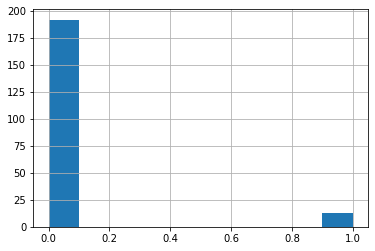

enginetype_rotor
count    205.000000
mean       0.019512
std        0.138655
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: enginetype_rotor, dtype: float64


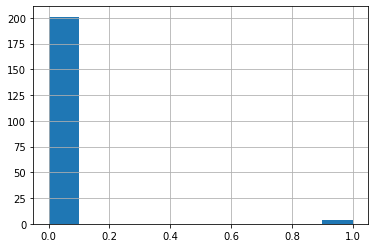

cylindernumber_eight
count    205.000000
mean       0.024390
std        0.154635
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: cylindernumber_eight, dtype: float64


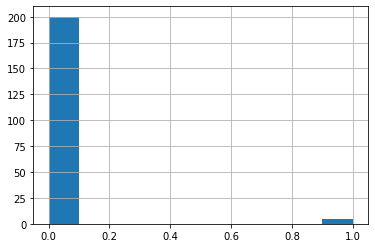

cylindernumber_five
count    205.000000
mean       0.053659
std        0.225894
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: cylindernumber_five, dtype: float64


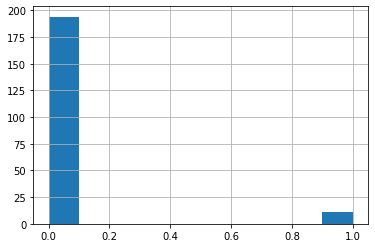

cylindernumber_four
count    205.000000
mean       0.775610
std        0.418201
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: cylindernumber_four, dtype: float64


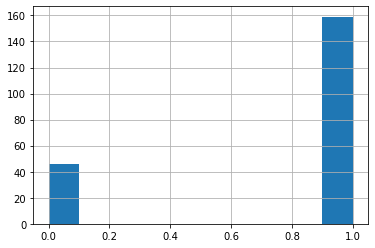

cylindernumber_six
count    205.000000
mean       0.117073
std        0.322294
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: cylindernumber_six, dtype: float64


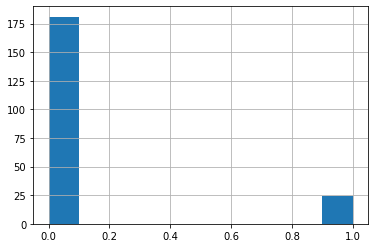

cylindernumber_three
count    205.000000
mean       0.004878
std        0.069843
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: cylindernumber_three, dtype: float64


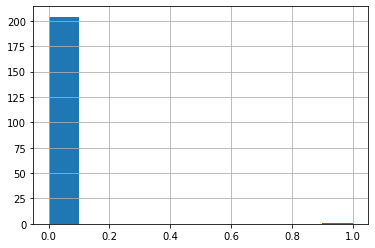

cylindernumber_twelve
count    205.000000
mean       0.004878
std        0.069843
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: cylindernumber_twelve, dtype: float64


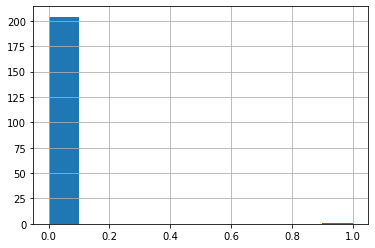

cylindernumber_two
count    205.000000
mean       0.019512
std        0.138655
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: cylindernumber_two, dtype: float64


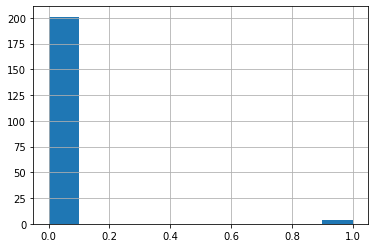

fuelsystem_1bbl
count    205.000000
mean       0.053659
std        0.225894
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fuelsystem_1bbl, dtype: float64


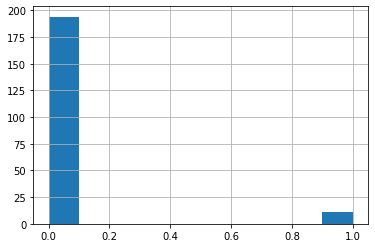

fuelsystem_2bbl
count    205.000000
mean       0.321951
std        0.468368
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: fuelsystem_2bbl, dtype: float64


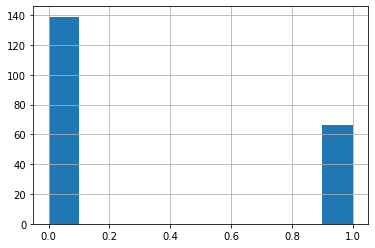

fuelsystem_4bbl
count    205.000000
mean       0.014634
std        0.120377
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fuelsystem_4bbl, dtype: float64


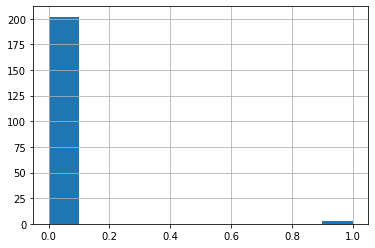

fuelsystem_idi
count    205.000000
mean       0.097561
std        0.297446
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fuelsystem_idi, dtype: float64


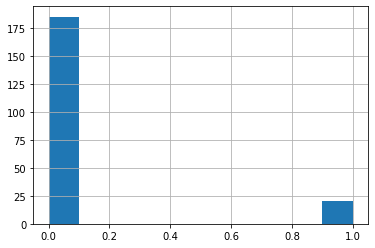

fuelsystem_mfi
count    205.000000
mean       0.004878
std        0.069843
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fuelsystem_mfi, dtype: float64


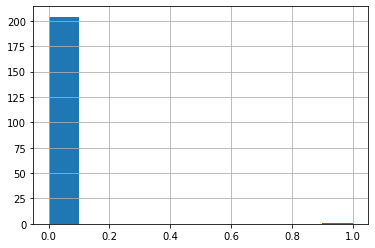

fuelsystem_mpfi
count    205.000000
mean       0.458537
std        0.499498
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: fuelsystem_mpfi, dtype: float64


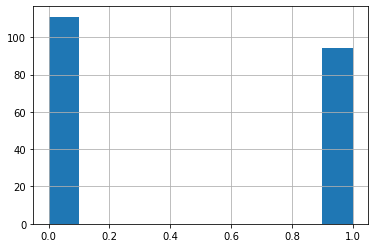

fuelsystem_spdi
count    205.000000
mean       0.043902
std        0.205380
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fuelsystem_spdi, dtype: float64


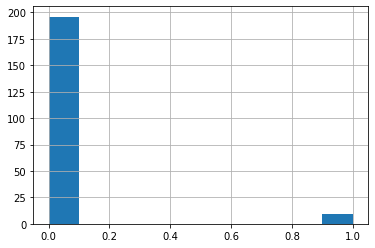

fuelsystem_spfi
count    205.000000
mean       0.004878
std        0.069843
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fuelsystem_spfi, dtype: float64


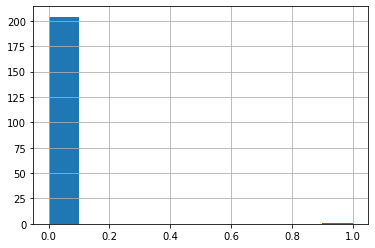

In [11]:
### The following code performs descriptive statistics analysis of each numerical field of the dataset
for c in cardata.columns:
    print(c)
    print(cardata[c].describe())
    cardata[c].hist()
    plt.show()

- Question: Which is the average and median for the length of the available cars on the dataset?

In [12]:
# Your answer here. You can show the code which justifies your answer
# 
# Your code here

- Question: Which is the average and median of the width of the available cars on the dataset?

In [13]:
# Your answer here. You can show the code which justifies your answer
# 
# Your code here

### Confidence intervals

Hint: use the appropriate functions from exercise 03-Confidence intervals

- If we’re working with a small sample (n <30), we can use the t.interval() function from the scipy.stats library to calculate a confidence interval for a population mean.

- If we’re working with larger samples (n≥30), we can assume that the sampling distribution of the sample mean is normally distributed (thanks to the Central Limit Theorem) and can instead use the norm.interval() function from the scipy.stats library.

- Question: which is the 95% confidence interval for the length of the cars available on the dataset?

In [14]:
# Your answer here. You can show the code which justifies your answer
# 
# Your code here

- Question: which is the 95% confidence interval for the width of the cars available on the dataset?

In [15]:
# Your answer here. You can show the code which justifies your answer
# 
# Your code here

### Hypothesis testing

We want to check the following hypothesis: Diesel cars are more expensive than gas cars

To do so, we will perform a hypothesis test.

- H0: average price of diesel cars = average price of gas cars
- H1: average price of diesel cars <> average price of gas cars

In [16]:
cardata.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'price', 'total_mpg', 'symboling_-1', 'symboling_-2',
       'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3',
       'Company_alfa-romero', 'Company_audi', 'Company_bmw', 'Company_buick',
       'Company_chevrolet', 'Company_dodge', 'Company_honda', 'Company_isuzu',
       'Company_jaguar', 'Company_mazda', 'Company_mercury',
       'Company_mitsubishi', 'Company_nissan', 'Company_peugeot',
       'Company_plymouth', 'Company_porsche', 'Company_renault',
       'Company_saab', 'Company_subaru', 'Company_toyota',
       'Company_volkswagen', 'Company_volvo', 'fueltype_diesel',
       'fueltype_gas', 'aspiration_std', 'aspiration_turbo', 'doornumber_four',
       'doornumber_two', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       'dri

In [17]:
# Data preparation. We split the dataset in two
cardata_diesel = cardata[cardata['fueltype_gas'] == 0]['price']
cardata_gas = cardata[cardata['fueltype_gas'] == 1]['price']

In [18]:
# Summary
print(cardata_diesel.describe()) # 20 cars
print(cardata_gas.describe())    # 185 cars

count       20.000000
mean     15838.150000
std       7759.843713
min       7099.000000
25%       9120.000000
50%      13852.500000
75%      19375.500000
max      31600.000000
Name: price, dtype: float64
count      185.000000
mean     12999.798200
std       7984.409306
min       5118.000000
25%       7689.000000
50%       9989.000000
75%      15998.000000
max      45400.000000
Name: price, dtype: float64


Hint: use the appropriate functions from exercise 04-Hypothesis testing

Perform the specified hypothesis testing.

- Question: Which kind of hypothesis test will you use?

In [19]:
# Your answer here.

Perform the specified hypothesis testing. 
- What can you conclude? 
- How confident are with your answer (which is the p-value of your answer)?

In [20]:
# Your answer here. You can show the code which justifies your answer
# 
# Your code here

### Linear model

Finally, we want to develop a linear model to check how some variables affect the price of the cars.

Hint: you can use the code from exercices 6 and 7

- Question: Develop a model to study price depending on engine size and the independent term. (Model A)
  * Is the model a good model? Why?
  * Is the relation between engine size and price statistically significative? Why?

In [21]:
# Your answer here. You can show the code which justifies your answer
# 
# Your code here

- Question: Develop a model to study price depending on fuel type and the independent term. (Model B)
  * Is the model a good model? Why? 
  * Is the relation between engine size and price statistically significative? Why?
  
Hint: you can work with either fueltype_gas or fueltype_diesel variables (they are complementary variables)

In [22]:
# Your answer here. You can show the code which justifies your answer
# 
# Your code here

- Question: Perform the qq-plot analysis for the residuals of the model that relates price depending on engine size and the independent term (Model A)
  * What can you conclude from this analysis?

In [23]:
# Your answer here. You can show the code which justifies your answer
# 
# Your code here

- Question: Perform the qq-plot analysis for the residuals of the model that relates price depending on fuel type and the independent term (Model B)
  * What can you conclude from this analysis?

In [24]:
# Your answer here. You can show the code which justifies your answer
# 
# Your code here

### Recap

- This exercise is the deliverable part of the laboratory series of the Statistical Methods subject.
- The exercise covers the main topics seen during the course:
  * Descriptive statistics
  * Confidence intervals
  * Hypothesis testing
  * Linear model
- You will need to answer the proposed questions across the notebook
- Once you have finished, please submit the exercise via the Campus Virtual application
- Please append your name and surname on the name of the exercise
- Thank you and good luck!